# ipywidgets 소개
***

Docs: <https://ipywidgets.readthedocs.io/en/latest/index.html>



## 1. 간단한 예제
---

csv로 저장되어있는 삼성전자의 일봉 데이터를 불러온다.

In [1]:
import pandas as pd

date_parser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")

daily_data = pd.read_csv(
    "daily_005930.csv",
    index_col="date",
    parse_dates=True,
    date_parser=date_parser,
    encoding="euc_kr"
)

print(daily_data)

            open_prc  high_prc  low_prc  close_prc  base_prc    volume
date                                                                  
1999-06-03     92000     92300    88100      91000     90300    994982
1999-06-04     91000     96000    91000      95000     91000   1042697
1999-06-07     98000    102000    96800     102000     95000   1155707
1999-06-08    102000    102500    98100      99500    102000    957041
1999-06-09     97000     98000    91500      91500     99500    726697
...              ...       ...      ...        ...       ...       ...
2019-08-21     44350     44800    44150      44500     44450   6571717
2019-08-22     44500     44700    43850      44050     44500   8061177
2019-08-23     43800     44200    43650      43950     44050   5017381
2019-08-26     43050     43800    42950      43600     43950   7954949
2019-08-27     43650     44200    43600      44050     43600  16883932

[4999 rows x 6 columns]


---
일정 기간만큼 잘라서 그래프를 그려본다

In [2]:
import datetime
import matplotlib.pylab as plt

def plot_data(st_date, ed_date):
    if st_date < ed_date:
        sliced_data = daily_data.loc[st_date:ed_date, "close_prc"]
        sliced_data.plot(figsize=(12, 6))
        plt.title("Close Price ({0}~{1})".format(st_date, ed_date))
        plt.legend(["Samsung Electronics"])
        plt.show()

ST_DATE = datetime.date(2019, 1, 1)
ED_DATE = datetime.date(2019, 8, 27)

plot_data(ST_DATE, ED_DATE)

<Figure size 1200x600 with 1 Axes>

---
기간을 바꿔서 그래프를 그려본다

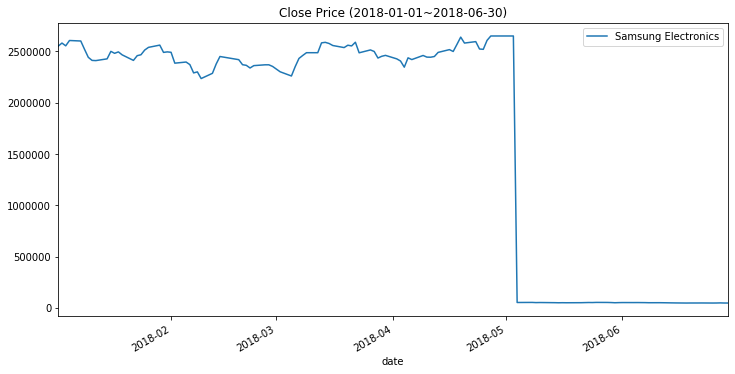

In [3]:
ST_DATE = datetime.date(2018, 1, 1)
ED_DATE = datetime.date(2018, 6, 30)

plot_data(ST_DATE, ED_DATE)

---
ipywidgets을 사용하면 다음과 같이 쉽게 인자를 수정할 수 있다.

In [4]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

interact(plot_data,
         st_date=widgets.DatePicker(value=datetime.date(2016,1,1)),
         ed_date=widgets.DatePicker(value=datetime.date(2019,1,1)));

interactive(children=(DatePicker(value=datetime.date(2016, 1, 1), description='st_date'), DatePicker(value=dat…

## 2. 기본적인 사용방법
---

In [5]:
# 간단한 함수
def foo(x):
    print(x)

# Slider가 자동으로 생성된다.
print("x=10의 결과")
interact(foo, x=10);

# Checkbox가 자동으로 생성된다.
print("\n\n\nx=True의 결과")
interact(foo, x=True);

# TextBox가 자동으로 생성된다.
print("\n\n\nx=\"abc\"의 결과")
interact(foo, x="abc");

x=10의 결과


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…




x=True의 결과


interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))




x="abc"의 결과


interactive(children=(Text(value='abc', description='x'), Output()), _dom_classes=('widget-interact',))

In [6]:
# 인자를 여러개
def foo2(x, y, z):
    print("x:", x)
    print("y:", y)
    print("z:", z)

interact(foo2, x=5, y=20, z=fixed(10));

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), IntSlider(value=20, description='y'…

In [7]:
# Slider를 생성하며 범위는 0~100
interact(foo, x=(0, 100));

# Slider를 생성하며 범위는 0~100, 단위는 2, 기본값은 30
interact(foo, x=widgets.IntSlider(min=10, max=100, step=2, value=30));

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(IntSlider(value=30, description='x', min=10, step=2), Output()), _dom_classes=('widget-i…

In [8]:
from IPython.display import display
from ipywidgets import interactive

def sum_func(x, y):
    print(x + y)

interactive_obj = interactive(sum_func, x=10, y=20)
type(interactive_obj)

ipywidgets.widgets.interaction.interactive

In [9]:
display(interactive_obj)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), IntSlider(value=20, description='…

In [10]:
display(interactive_obj)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), IntSlider(value=20, description='…

In [11]:
from ipywidgets import interact_manual

# Slider를 생성하며 범위는 0~100
interact_manual(foo, x=(0, 100));

# Slider를 생성하며 범위는 0~100
interact(foo, x=widgets.IntSlider(min=10, max=100, step=2, value=30, continuous_update=False));

interactive(children=(IntSlider(value=50, description='x'), Button(description='Run Interact', style=ButtonSty…

interactive(children=(IntSlider(value=30, continuous_update=False, description='x', min=10, step=2), Output())…

In [12]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, "value"), (b, "value"))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [13]:
# 연결 끊기
mylink.unlink()

Widget List: <https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html>

In [83]:
import ipywidgets
import requests
import datetime
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interact_manual

def plot_upbit_data(mk, to, count):
    url = "https://api.upbit.com/v1/candles/days?market={0}&to={1} 00:00:00&count={2}".format(mk, to, count)
    datas = requests.request("GET", url).json()
    daily_data = pd.DataFrame(datas, columns=("candle_date_time_kst", "trade_price"))
    daily_data["candle_date_time_kst"] = pd.to_datetime(daily_data["candle_date_time_kst"])
    daily_data["trade_price"] = daily_data["trade_price"].astype(int)
    daily_data = daily_data.set_index("candle_date_time_kst")
    daily_data.plot(figsize=(12, 6))
    plt.legend([mk])
    plt.show()

url = "https://api.upbit.com/v1/market/all"
masters = requests.request("GET", url).json()
combo_datas = []

for master in masters:
	mk = master["market"]

	if "KRW" == mk[:3]:
		combo_datas.append((
			master["korean_name"],
			mk,
		))

interact_manual(
	plot_upbit_data,
	mk=ipywidgets.Dropdown(options=combo_datas, description="KRW Market"),
	to=ipywidgets.DatePicker(value=datetime.date.today()),
	count=ipywidgets.IntSlider(min=10, max=200, value=30)
);

interactive(children=(Dropdown(description='KRW Market', options=(('비트코인', 'KRW-BTC'), ('대시', 'KRW-DASH'), ('이…